In [20]:
import io
import time
#import graphviz 
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import svc
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn import datasets, metrics, preprocessing
from sklearn.model_selection import GridSearchCV, learning_curve
#from keras.models import Sequential
#from keras.optimizers import rmsprop
#from keras.layers import Dense, Activation

import warnings
warnings.filterwarnings("ignore")



data=pd.read_csv('Todas_las_ligas.csv',sep=';')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31532 entries, 0 to 31531
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       7650 non-null   object 
 1   Date      24154 non-null  object 
 2   HomeTeam  31532 non-null  object 
 3   AwayTeam  31532 non-null  object 
 4   FTHG      31532 non-null  int64  
 5   FTAG      31532 non-null  int64  
 6   FTR       24154 non-null  object 
 7   HTHG      16700 non-null  float64
 8   HTAG      16700 non-null  float64
 9   HTR       16700 non-null  object 
 10  Season    24692 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 2.6+ MB


<AxesSubplot:xlabel='FTR', ylabel='count'>

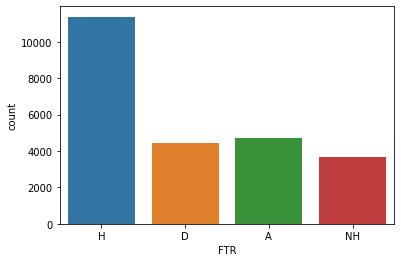

In [12]:
#preprocessing data



sns.countplot(data['FTR'])

In [14]:
features = ['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HTR']
y_target = 'FTR'


# Drop rows with nan
data = data.dropna()

for col in ['HomeTeam', 'AwayTeam', 'Season', 'HTR']:

    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

x = data[features]
y = data['FTR']

# x = bundesliga.drop('FTR',axis=1)
# y = bundesliga['FTR']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
#RANDOM FOREST CLASSIFIER
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train) 
pred_rfc=rfc.predict(x_test)
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           A       0.99      1.00      1.00       399
           D       1.00      0.99      0.99       386
           H       1.00      1.00      1.00       623

    accuracy                           1.00      1408
   macro avg       1.00      1.00      1.00      1408
weighted avg       1.00      1.00      1.00      1408

[[398   1   0]
 [  2 383   1]
 [  0   0 623]]


In [16]:
#SVM CLASSIFIER
clf=svm.SVC()
clf.fit(x_train, y_train )
pred_clf= clf.predict(x_test)
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))


              precision    recall  f1-score   support

           A       1.00      0.89      0.94       399
           D       0.87      0.94      0.90       386
           H       0.96      0.98      0.97       623

    accuracy                           0.94      1408
   macro avg       0.94      0.94      0.94      1408
weighted avg       0.95      0.94      0.94      1408

[[356  43   0]
 [  0 363  23]
 [  0  13 610]]


In [19]:
#Neural Network
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(x_train, y_train)
pred_mlpc= mlpc.predict(x_test)
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       399
           D       1.00      1.00      1.00       386
           H       1.00      1.00      1.00       623

    accuracy                           1.00      1408
   macro avg       1.00      1.00      1.00      1408
weighted avg       1.00      1.00      1.00      1408

[[399   0   0]
 [  0 386   0]
 [  0   0 623]]
